In [5]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import statsmodels.tsa.api as tsa
import statsmodels.api as sm
import pandas as pd

In [6]:
def get_returns(x):
    return (x[1:] - x[:-1]) / (x[:-1])

def get_log_returns(x):
    return np.log(x[1:]/x[:-1])

In [169]:
def random_walk(n_steps=365, sigma=1, start = 0):
    
    values = []
    x = start
    values.append(x)
    for i in range(n_steps-1):
        x = x + np.random.normal(scale=sigma)
        values.append(x)
    a = np.array(values)
    return a 
    
    
    

In [185]:
def random_walk_with_drift(n_steps=365, sigma=1, drift=0.01, start = 0):
    
    values = []
    x = start
    values.append(x)
    for i in range(n_steps-1):
        x = drift + x + np.random.normal(scale=sigma)
        values.append(x)
    a = np.array(values)
    return a 
    
    

In [181]:
def student_random_walk(n_steps=365, df=1, start = 0):
    
    values = []
    x = start
    values.append(x)
    for i in range(n_steps-1):
        x = x + np.random.standard_t(df=df)
        values.append(x)
    a = np.array(values)
    return a 
    
    
    

In [177]:
def plot_random_walk(w):
    plt.plot((w - np.mean(w)) / np.std(w))
    plt.show()
    returns = get_returns(w)
    sm.graphics.tsa.plot_acf(returns, lags=40)
    plt.show()
    plt.hist(returns,bins=20)
    plt.show()

In [135]:
def random_walk_sampled(n_steps=365, samples_per_step=24, sigma=1, start = 0):
    
    values = []
    x = start
    values.append(x)
    for i in range(n_steps-1):
        y = x 
        for j in range(samples_per_step):
            y = y + np.random.normal(scale=sigma)
        x = y
        values.append(x)
    
    a = np.array(values)
    return a  
    
    
    

-0.0073232181233943115


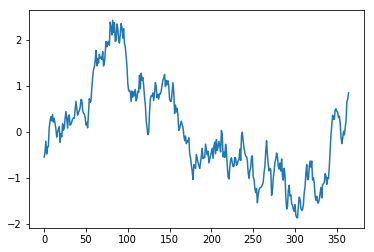

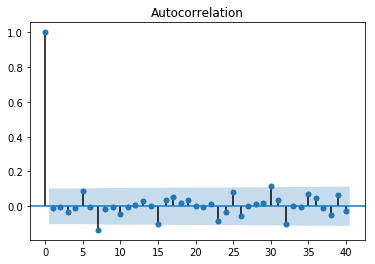

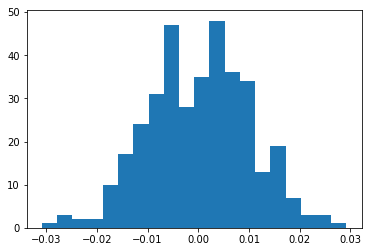

0.01168070748630309


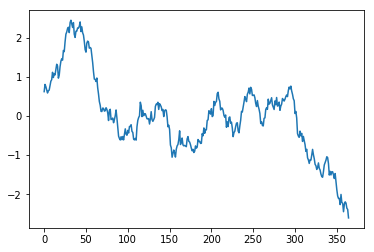

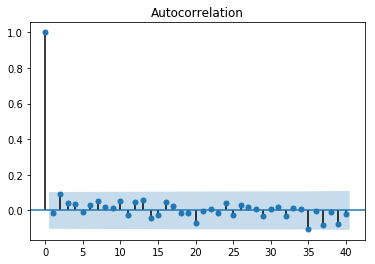

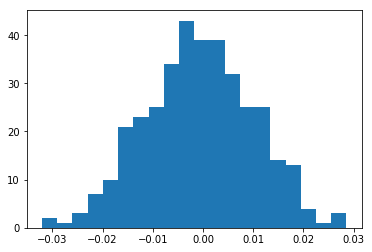

0.005009095938507371


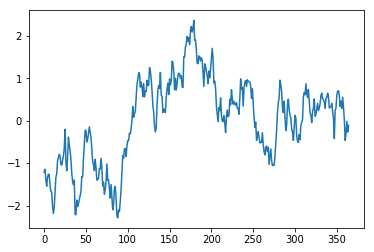

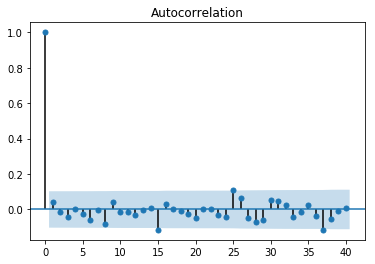

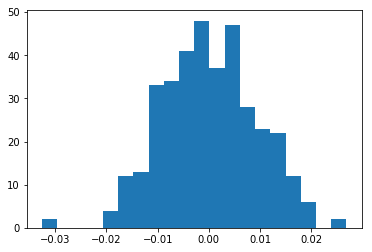

0.015473761375826175


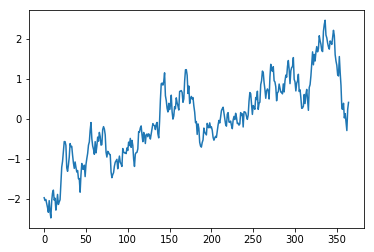

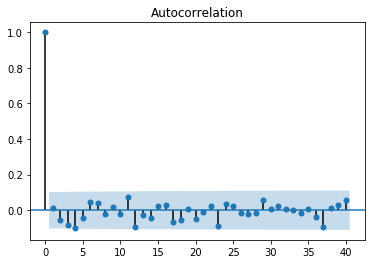

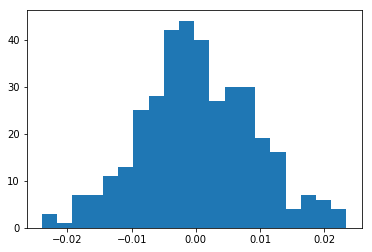

-0.005802976530852329


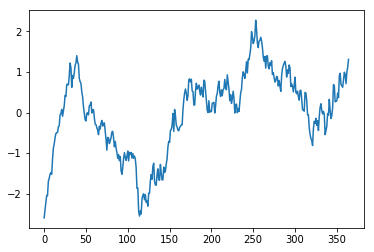

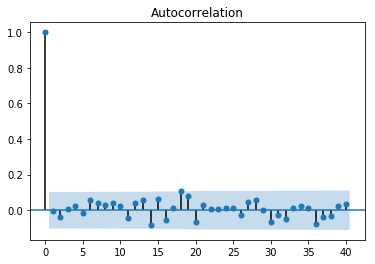

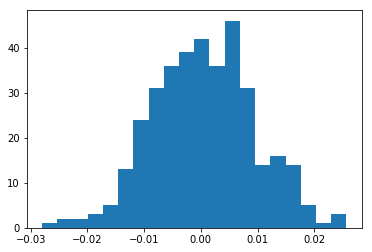

-0.016403833701049714


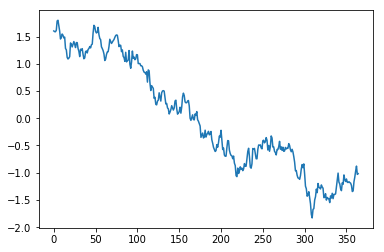

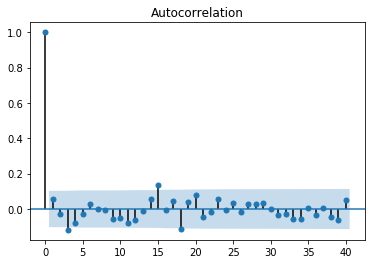

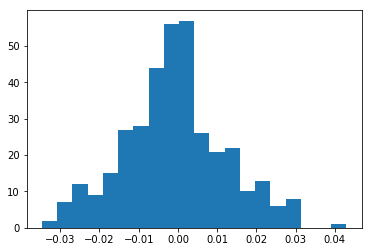

-0.011807105255127919


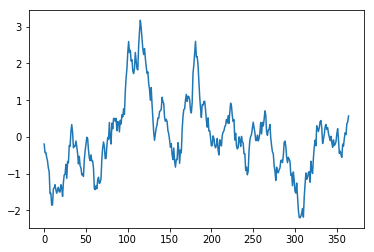

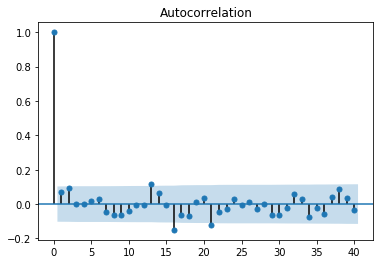

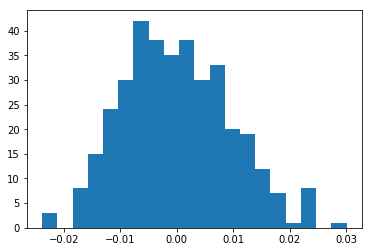

-0.0026100328934275698


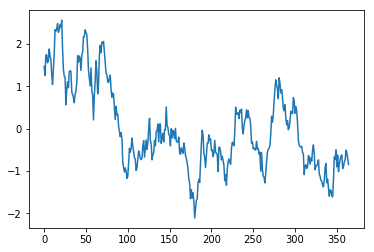

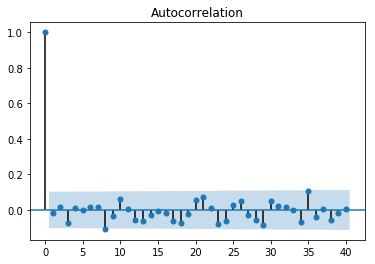

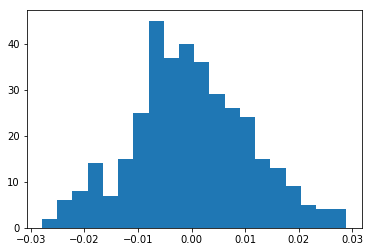

0.009609514235724741


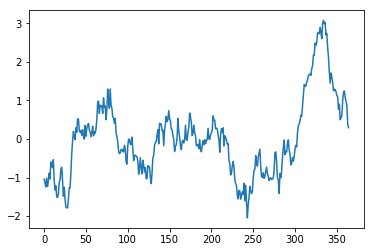

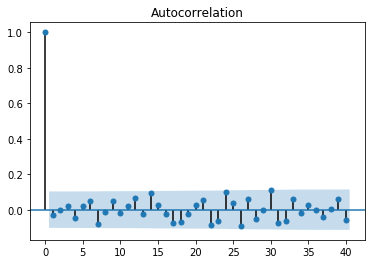

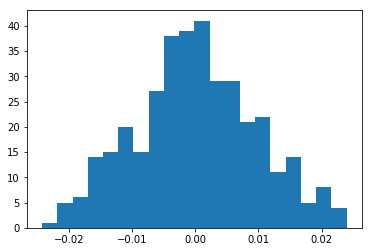

0.004879219417871859


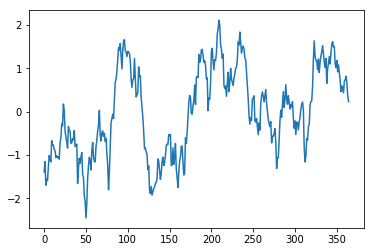

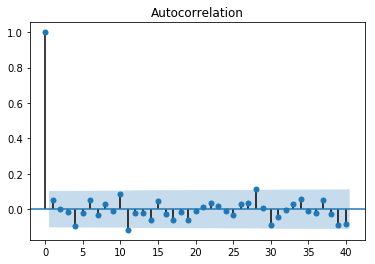

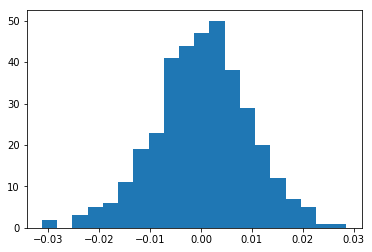

In [192]:
walks = [ (drift,random_walk_with_drift(n_steps=365,drift=drift,start=100)) for drift in np.random.uniform(low=-0.02, high=0.02, size=10) ]
for drift,w in walks:
    print(drift)
    plot_random_walk(w)

In [16]:
statsmodels.tsa.acf(w)

AttributeError: module 'statsmodels' has no attribute 'tsa'

In [28]:
diff = np.array(w[:-1]) - np.array(w[1:])

In [44]:
path = "data/daily/us/nasdaq stocks/2/tsla.us.txt"
import pandas as pd

In [1]:
import glob
stock_paths = list(glob.iglob("data/daily/us/nasdaq stocks/*/*txt") )
print(stock_paths[:10])

['data/daily/us/nasdaq stocks/2/nbacr.us.txt', 'data/daily/us/nasdaq stocks/2/ptvca.us.txt', 'data/daily/us/nasdaq stocks/2/umbf.us.txt', 'data/daily/us/nasdaq stocks/2/qrtep.us.txt', 'data/daily/us/nasdaq stocks/2/jrvr.us.txt', 'data/daily/us/nasdaq stocks/2/ssti.us.txt', 'data/daily/us/nasdaq stocks/2/sglb.us.txt', 'data/daily/us/nasdaq stocks/2/otrk.us.txt', 'data/daily/us/nasdaq stocks/2/snoa.us.txt', 'data/daily/us/nasdaq stocks/2/mdia.us.txt']


In [106]:
data = []
for p in stock_paths:
    try:
        d = pd.read_csv(p)
        if len(d) >=365:
            data.append(d)
    except:
        pass

In [207]:
np.log(1+ -2.0)

/home/cehmann/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


nan

0


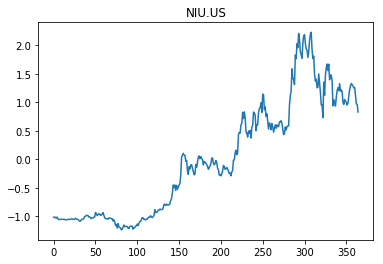

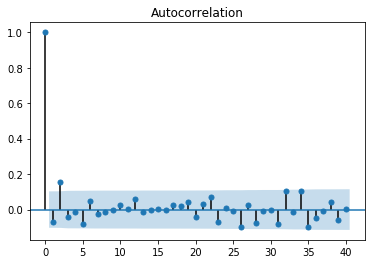

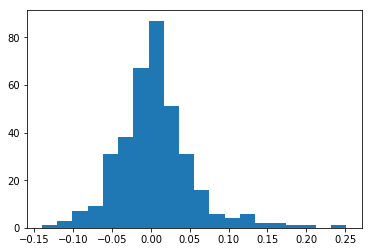

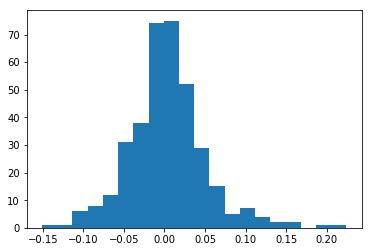

1


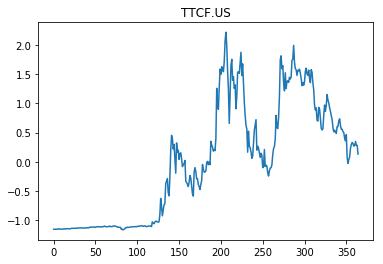

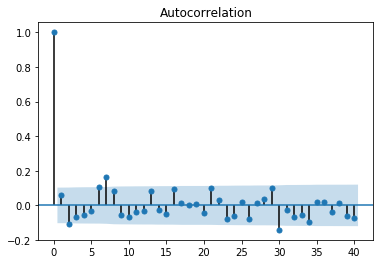

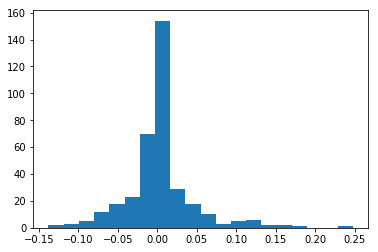

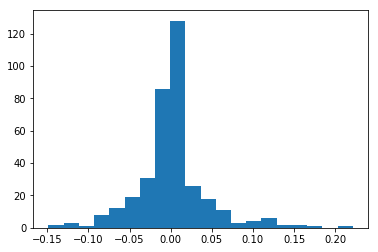

2


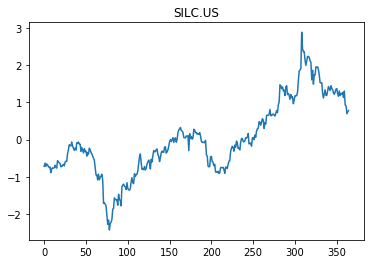

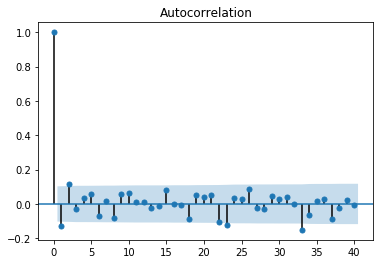

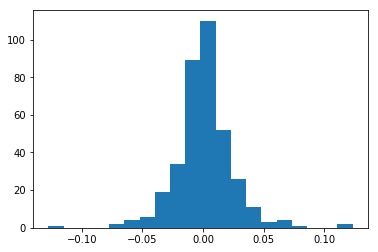

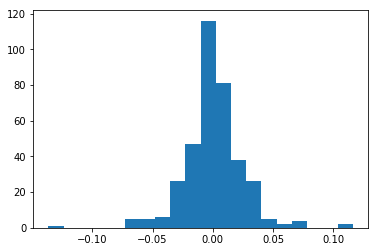

3


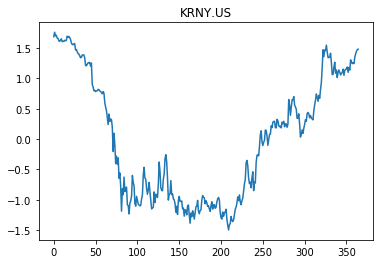

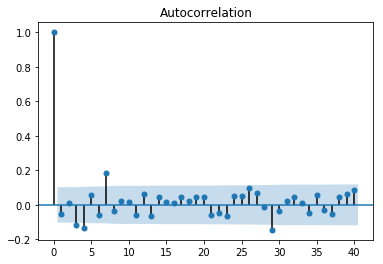

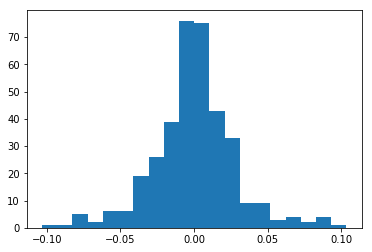

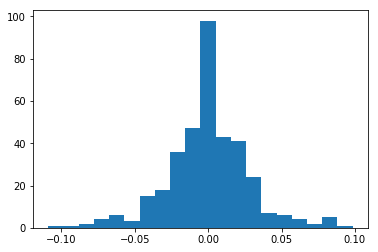

4


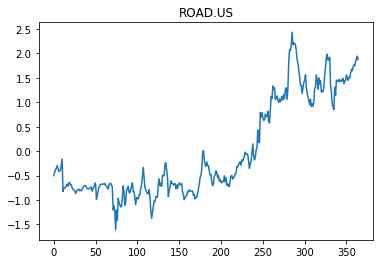

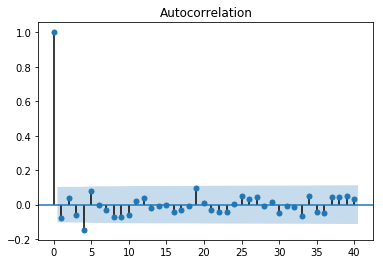

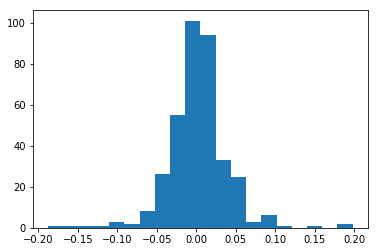

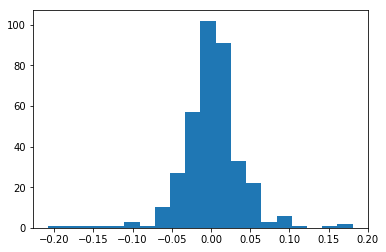

5


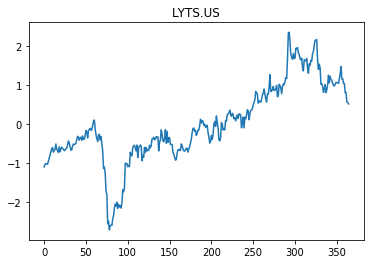

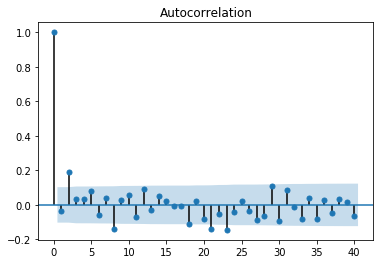

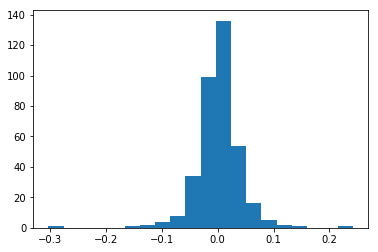

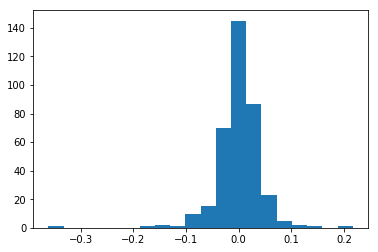

6


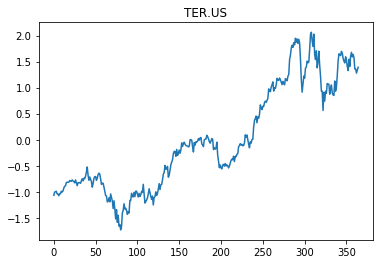

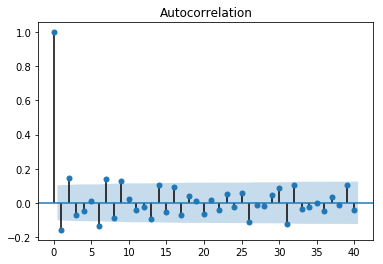

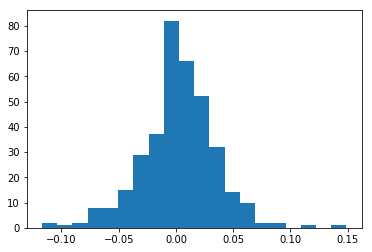

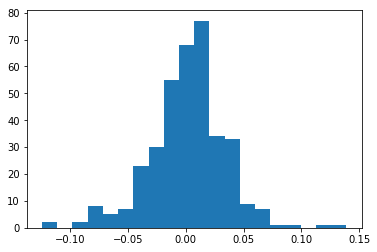

7


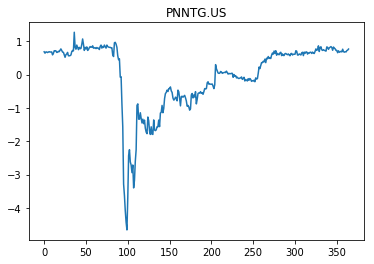

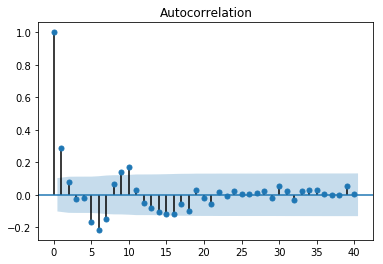

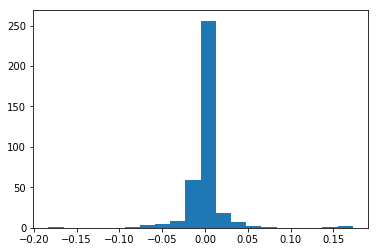

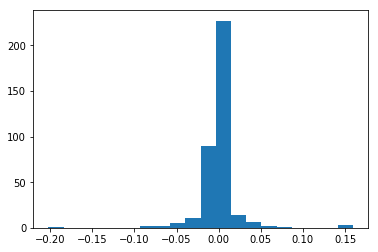

8


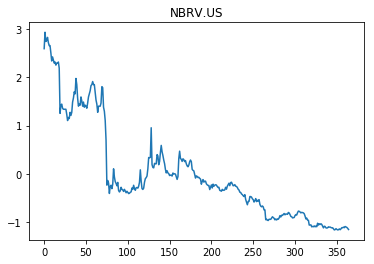

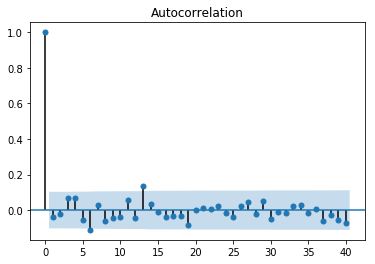

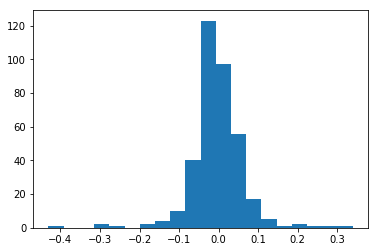

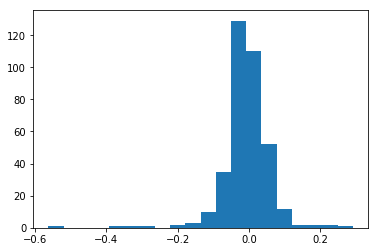

9


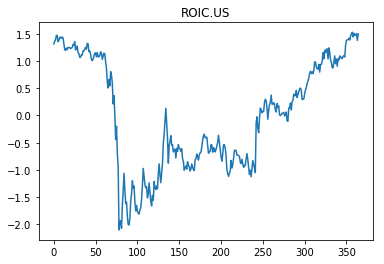

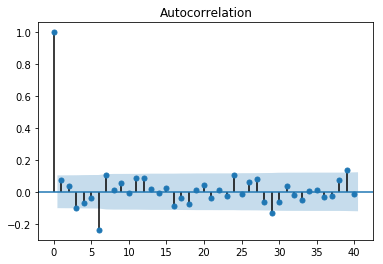

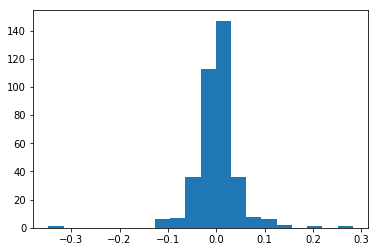

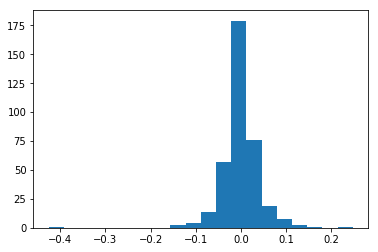

10


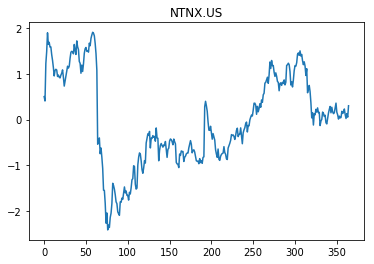

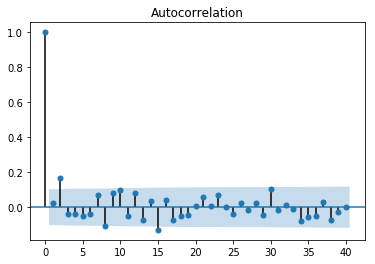

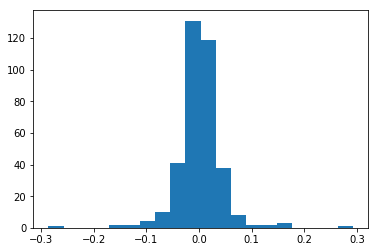

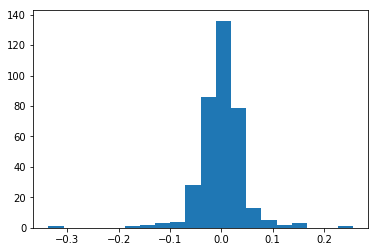

11


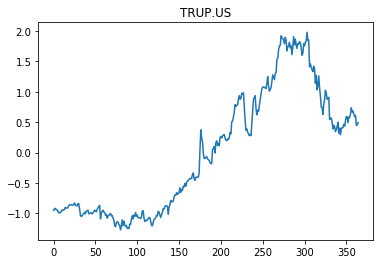

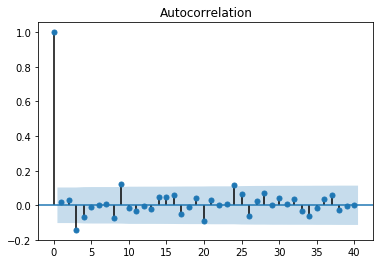

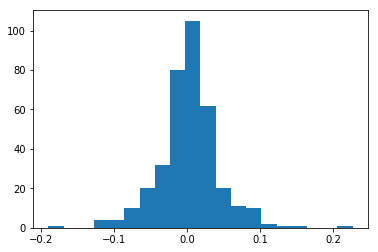

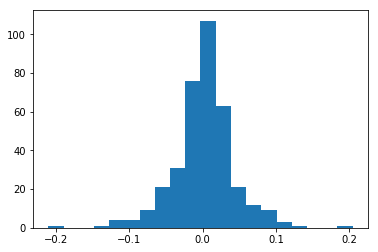

12


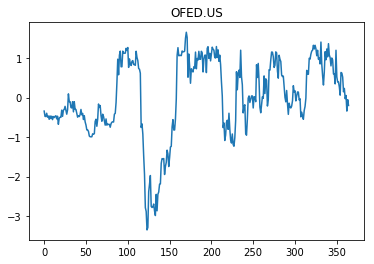

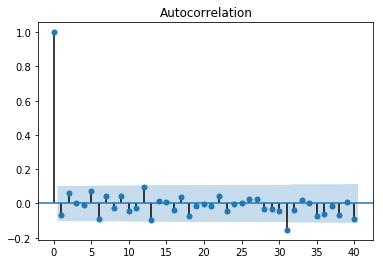

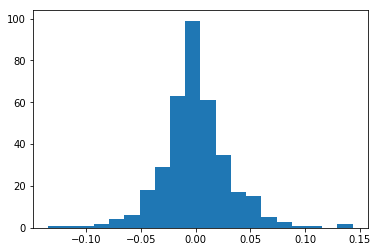

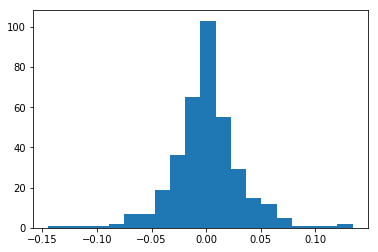

13


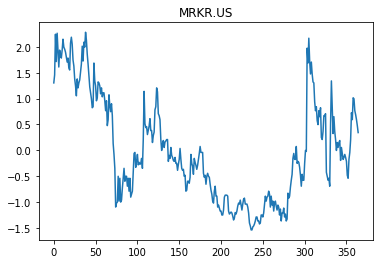

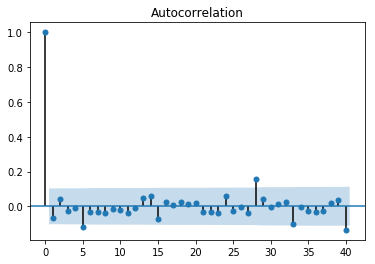

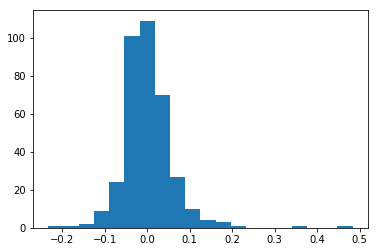

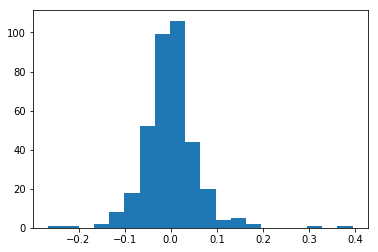

14


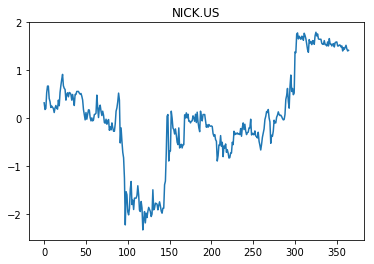

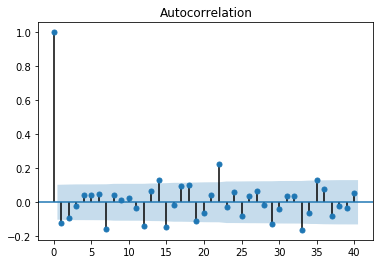

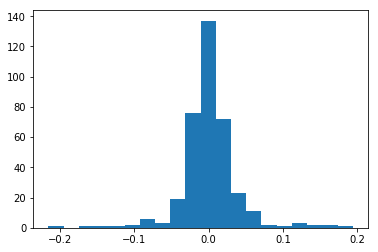

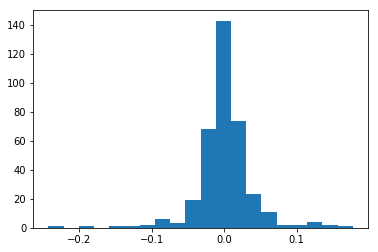

15


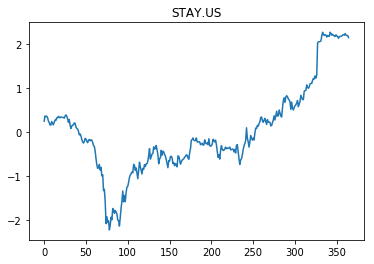

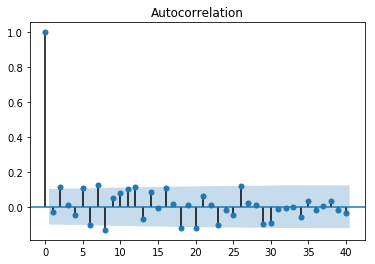

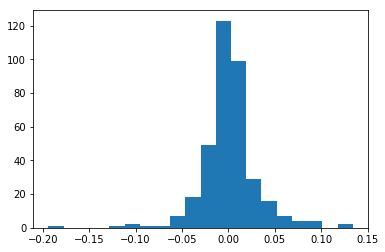

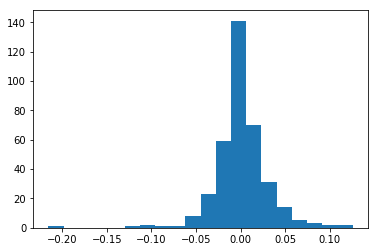

16


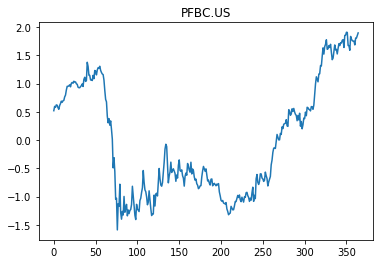

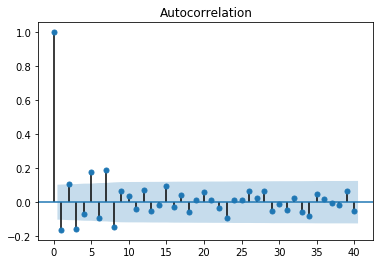

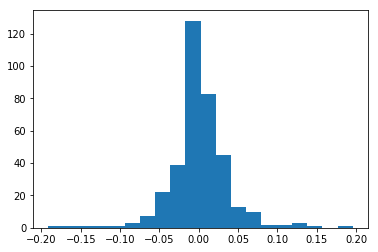

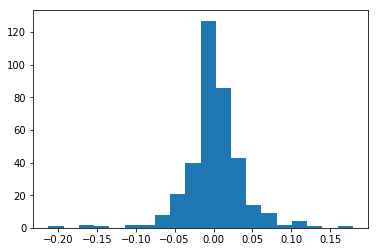

17


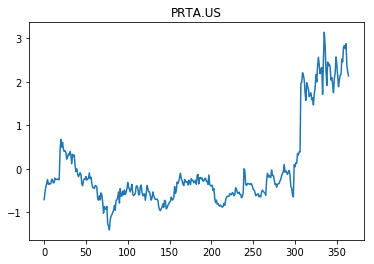

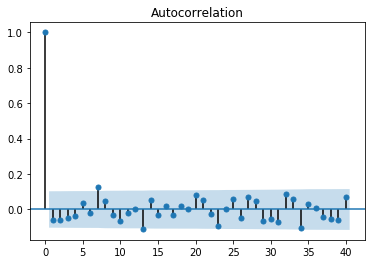

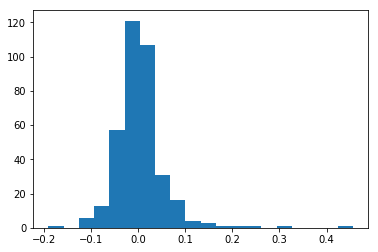

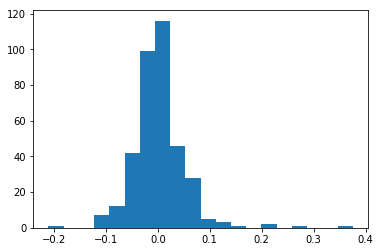

18


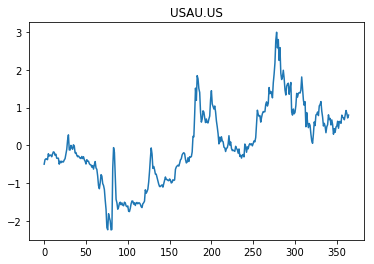

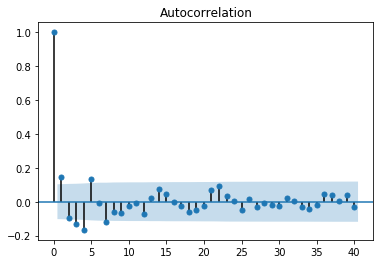

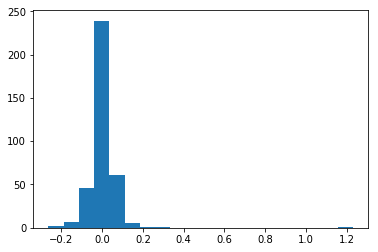

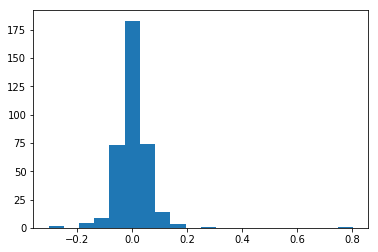

19


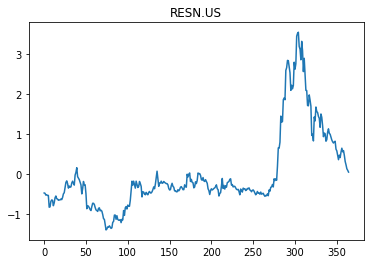

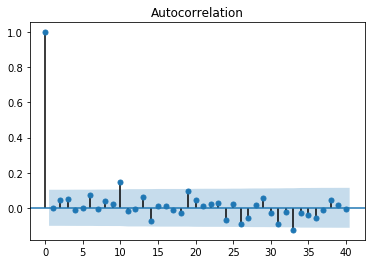

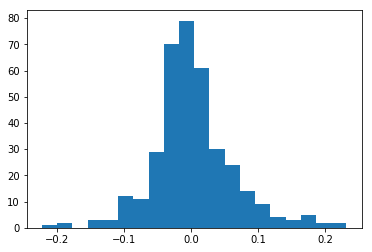

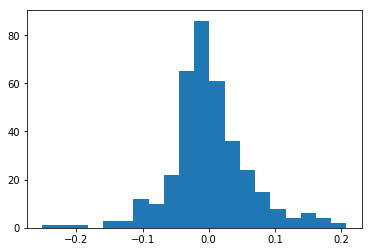

In [213]:
    
def plot_last_356_days(d):
    closing_prices = d["<CLOSE>"]
    last_365_days = np.array(closing_prices[-365:])
    normed= (last_365_days  - np.mean(last_365_days) )/ np.std(last_365_days)
    plt.plot(normed)
    plt.title(d["<TICKER>"][0])
    plt.show()

    returns = get_returns(last_365_days/ last_365_days[0])
    sm.graphics.tsa.plot_acf(returns, lags=40)
    plt.show()
    plt.hist(returns,bins=20)
    plt.show()
    log_returns = get_log_returns(last_365_days/last_365_days[0])
    plt.hist(log_returns,bins=20)
    plt.show()
    
for i,d in enumerate(data[20:40]):
    print(i)
    plot_last_356_days(d)


In [ ]:
stock_paths = list(glob.iglob("data/daily/us/* stocks/*/*txt") )


In [14]:
stock_paths = list(glob.iglob("data/daily/us/nyse stocks/*/*txt") )
import warnings

#with warnings.catch_warnings(record=True) as w:
#    warnings.simplefilter("always")
import warnings
warnings.filterwarnings("error")
for p in stock_paths:
    try:
        d = pd.read_csv(p)
    except:
        continue
    array = np.array(d["<CLOSE>"])
    try:
        normed = (array  - np.mean(array)) / np.std(array)
    except RuntimeWarning:
        print(RuntimeWarning)
        print(p)
        print(d)

<class 'RuntimeWarning'>
data/daily/us/nyse stocks/2/mbox.us.txt
  <TICKER> <PER>    <DATE>  <TIME>  <OPEN>  <HIGH>  <LOW>  <CLOSE>   <VOL>  \
0  MBOX.US     D  20210506       0  25.205    25.4  25.16     25.4  115817   

   <OPENINT>  
0          0  
<class 'RuntimeWarning'>
data/daily/us/nyse stocks/2/zxiet.us.txt
     <TICKER> <PER>    <DATE>  <TIME>  <OPEN>  <HIGH>  <LOW>  <CLOSE>  <VOL>  \
0    ZXIET.US     D  20181005       0     100     100    100      100   2000   
1    ZXIET.US     D  20181015       0     100     100    100      100   4000   
2    ZXIET.US     D  20181016       0     100     100    100      100   4000   
3    ZXIET.US     D  20181017       0     100     100    100      100   4000   
4    ZXIET.US     D  20181018       0     100     100    100      100   4000   
5    ZXIET.US     D  20181019       0     100     100    100      100   4000   
6    ZXIET.US     D  20181022       0     100     100    100      100   4000   
7    ZXIET.US     D  20181023       0     